In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
import warnings
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Yasmine Daly\Desktop\World_Cup_2018_Dataset.csv')
rk = pd.read_csv(r'C:\Users\Yasmine Daly\Desktop\fifa_ranking-2022-10-06.csv')
mt=pd.read_csv(r'C:\Users\Yasmine Daly\Desktop\results.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Team                                  32 non-null     object 
 1   Group                                 32 non-null     object 
 2   Previous 
appearances                 32 non-null     int64  
 3   Previous 
titles                      32 non-null     int64  
 4   Previous
 finals                      32 non-null     int64  
 5   Previous
 semifinals                  32 non-null     int64  
 6   Current 
FIFA rank                    32 non-null     int64  
 7   First_match_against                   32 non-null     object 
 8   Match index                           32 non-null     int64  
 9   history with 
first opponent
 W-L     20 non-null     float64
 10  history with
 first opponent
 goals   20 non-null     float64
 11  Second_match_against 

In [4]:
df.head(10)

,Team,Group,Previous \nappearances,Previous \ntitles,Previous\n finals,Previous\n semifinals,Current \nFIFA rank,First_match_against,Match index,history with \nfirst opponent\n W-L,history with\n first opponent\n goals,Second_match_against,Match index.1,history with\n second opponent\n W-L,history with\n second opponent\n goals,Third_match_against,Match index.2,history with\n third opponent\n W-L,history with\n third opponent\n goals
0,Russia,A,10,0,0,1,65,Saudi Arabia,1,-1.0,-2.0,Egypt,17,NaN,NaN,Uruguay,33,0.0,0.0
1,Saudi Arabia,A,4,0,0,0,63,Russia,1,1.0,2.0,Uruguay,18,1.0,1.0,Egypt,34,-5.0,-5.0
2,Egypt,A,2,0,0,0,31,Uruguay,2,-1.0,-2.0,Russia,17,NaN,NaN,Saudi Arabia,34,5.0,5.0
3,Uruguay,A,12,2,2,5,21,Egypt,2,1.0,2.0,Saudi Arabia,18,-1.0,-1.0,Russia,33,0.0,0.0
4,Porugal,B,6,0,0,2,3,Spain,3,-12.0,-31.0,Morocco,19,-1.0,-2.0,Iran,35,2.0,5.0
5,Spain,B,14,1,1,2,6,Portugal,3,12.0,31.0,Iran,20,NaN,NaN,Morocco,36,5.0,7.0
6,Morocco,B,4,0,0,0,40,Iran,4,-2.0,-2.0,Portugal,19,1.0,2.0,Spain,36,-5.0,-7.0
7,IRAN,B,4,0,0,0,32,Morocco,4,2.0,2.0,Spain,20,NaN,NaN,Portugal,35,-2.0,-5.0
8,France,C,14,1,2,5,9,Australia,5,1.0,6.0,Peru,21,-1.0,-1.0,Denmark,37,4.0,9.0
9,Australia,C,4,0,0,0,39,France,5,-1.0,-6.0,Denmark,22,-1.0,-3.0,Peru,38,NaN,NaN


In [5]:
df.isnull().values.any()

True

In [6]:
df.isna().sum()

Team                                       0
Group                                      0
Previous \nappearances                     0
Previous \ntitles                          0
Previous\n finals                          0
Previous\n semifinals                      0
Current \nFIFA rank                        0
First_match_against                        0
Match index                                0
history with \nfirst opponent\n W-L       12
history with\n first opponent\n goals     12
Second_match_against                       0
Match index.1                              0
history with\n second opponent\n W-L      10
history with\n second opponent\n goals    10
Third_match_against                        0
Match index.2                              0
history with\n third opponent\n W-L        4
history with\n third opponent\n goals      4
dtype: int64

In [7]:
df['Group'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype=object)

In [8]:
rk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63916 entries, 0 to 63915
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             63916 non-null  int64  
 1   country_full     63916 non-null  object 
 2   country_abrv     63916 non-null  object 
 3   total_points     63916 non-null  float64
 4   previous_points  63916 non-null  float64
 5   rank_change      63916 non-null  int64  
 6   confederation    63916 non-null  object 
 7   rank_date        63916 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 3.9+ MB


In [9]:
rk.head(10)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,GER,57.0,0.0,0,UEFA,12/31/1992
1,96,Syria,SYR,11.0,0.0,0,AFC,12/31/1992
2,97,Burkina Faso,BFA,11.0,0.0,0,CAF,12/31/1992
3,99,Latvia,LVA,10.0,0.0,0,UEFA,12/31/1992
4,100,Burundi,BDI,10.0,0.0,0,CAF,12/31/1992
5,101,Togo,TOG,10.0,0.0,0,CAF,12/31/1992
6,102,Angola,ANG,10.0,0.0,0,CAF,12/31/1992
7,95,Suriname,SUR,12.0,0.0,0,CONCACAF,12/31/1992
8,103,Luxembourg,LUX,10.0,0.0,0,UEFA,12/31/1992
9,105,St. Vincent and the Grenadines,VIN,9.0,0.0,0,CONCACAF,12/31/1992


In [10]:
mt.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [11]:
rk['country_abrv'].unique()

array(['GER', 'SYR', 'BFA', 'LVA', 'BDI', 'TOG', 'ANG', 'SUR', 'LUX',
       'VIN', 'FIJ', 'MOZ', 'IDN', 'ATG', 'JOR', 'SWZ', 'FRO', 'LTU',
       'UGA', 'PRK', 'PER', 'SLE', 'TAN', 'NIG', 'IRQ', 'GUA', 'LBR',
       'ETH', 'ALB', 'BOL', 'BHR', 'SGP', 'CGO', 'MAS', 'SDN', 'CRO',
       'BRB', 'YEM', 'CPV', 'SOL', 'LBY', 'BOT', 'BRU', 'DOM', 'LES',
       'IND', 'CUB', 'PAK', 'BLR', 'SEY', 'CTA', 'NEP', 'GAM', 'MTN',
       'KEN', 'BAN', 'SVN', 'OMA', 'GNB', 'LCA', 'HKG', 'PAN', 'GRN',
       'PUR', 'TAH', 'RSA', 'VEN', 'SMR', 'BEN', 'GUY', 'UKR', 'HAI',
       'EST', 'THA', 'MRI', 'MLT', 'EGY', 'CMR', 'SCO', 'USA', 'MEX',
       'BUL', 'CIV', 'WAL', 'YUG', 'ALG', 'GRE', 'ZAM', 'POR', 'AUT',
       'COL', 'BEL', 'HUN', 'TCH', 'URU', 'MAD', 'ITA', 'BRA', 'SWE',
       'ENG', 'IRL', 'NED', 'RUS', 'DEN', 'ARG', 'ROU', 'SUI', 'NGA',
       'NOR', 'ESP', 'FRA', 'CRC', 'POL', 'CYP', 'CAN', 'BER', 'UAE',
       'ZAI', 'IRN', 'GUI', 'ISR', 'ECU', 'JPN', 'JAM', 'PAR', 'MLI',
       'NZL', 'KUW',

In [12]:
result = rk.groupby('country_abrv')['total_points'].sum()

In [13]:
result

country_abrv
AFG     55322.70
AIA     33264.44
ALB    162745.60
ALG    192109.31
AND     66876.16
         ...    
YEM     85187.46
YUG     33665.00
ZAI      7344.00
ZAM    163424.78
ZIM    136368.81
Name: total_points, Length: 217, dtype: float64

In [14]:
mt['tournament'].unique()

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'Bolivarian Games',
       'CCCF Championship', 'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'Phillip Seaga Cup',
       'CONCACAF Championship', 'Copa Juan Pinto Durán', 'Arab Cup',
       'South Pacific Ga

In [15]:
mt.shape

(44060, 9)

In [16]:
mt = mt[mt['tournament'] != 'Friendly']
mt.shape

(26635, 9)

In [17]:
rk['rank_date'] = pd.to_datetime(rk['rank_date'])
mt['date'] = pd.to_datetime(mt['date'])

In [18]:
import datetime

rk['year'] = rk['rank_date'].dt.year
mt['year'] = mt['date'].dt.year
rankings_sub = rk[rk['rank_date'] > '2013-08-24']
matches_sub = mt[mt['date'] > '2013-08-24']

In [19]:
rankings_sub = rankings_sub[['rank', 'country_full', 'total_points', 'year']]
rankings_sub = rankings_sub.groupby(['year', 'country_full'], as_index=False).agg({'rank': 'mean', 'total_points': 'mean'})

matches_sub.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
35740,2013-08-25,Mozambique,Angola,0.0,0.0,African Nations Championship,Maputo,Mozambique,False,2013
35741,2013-08-26,Cameroon,DR Congo,0.0,1.0,African Nations Championship,Garoua,Cameroon,False,2013
35744,2013-08-30,DR Congo,Cameroon,1.0,1.0,African Nations Championship,Lubumbashi,DR Congo,False,2013
35746,2013-08-31,Angola,Mozambique,1.0,1.0,African Nations Championship,Benguela,Angola,False,2013
35747,2013-08-31,Nepal,Bangladesh,2.0,0.0,SAFF Cup,Kathmandu,Nepal,False,2013


In [20]:
matches_all = matches_sub.merge(rankings_sub, left_on=['home_team', 'year'], right_on=['country_full', 'year'], how='inner')
matches_all = matches_all.merge(rankings_sub, left_on=['away_team', 'year'], right_on=['country_full', 'year'], how='inner')
matches_all.drop(['date', 'tournament', 'city', 'country', 'year', 'country_full_x', 'country_full_y'], axis=1, inplace=True)
matches_all.head()

,home_team,away_team,home_score,away_score,neutral,rank_x,total_points_x,rank_y,total_points_y
0,Mozambique,Angola,0.0,0.0,False,117.25,275.00,89.75,386.50
1,Cameroon,Libya,1.0,0.0,False,55.25,584.75,63.25,540.50
2,Cameroon,Tunisia,4.0,1.0,False,55.25,584.75,47.50,634.75
3,Angola,Mozambique,1.0,1.0,False,89.75,386.50,117.25,275.00
4,Zimbabwe,Mozambique,1.0,1.0,False,104.00,317.50,117.25,275.00


In [21]:
matches_all['total_diff'] = matches_all['total_points_x'] - matches_all['total_points_y']
matches_all['rank_diff'] = matches_all['rank_x'] - matches_all['rank_y']
matches_all['neutral'] = matches_all['neutral'].astype(int)
matches_all['is_win'] = (matches_all['home_score'] - matches_all['away_score']).apply(lambda x: 1 if x>0 else 0)
train = matches_all.drop(['home_team', 'away_team', 'home_score', 'away_score'], axis=1)
train.head()

,neutral,rank_x,total_points_x,rank_y,total_points_y,total_diff,rank_diff,is_win
0,0,117.25,275.00,89.75,386.50,-111.50,27.50,0
1,0,55.25,584.75,63.25,540.50,44.25,-8.00,1
2,0,55.25,584.75,47.50,634.75,-50.00,7.75,1
3,0,89.75,386.50,117.25,275.00,111.50,-27.50,0
4,0,104.00,317.50,117.25,275.00,42.50,-13.25,0


In [22]:
train_X = train.drop('is_win', axis=1)
train_y = train['is_win']

In [23]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable


In [24]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [25]:
classifiers = {'Random Forest': RandomForestClassifier(n_estimators=300),
              'LightGBM': LGBMClassifier(n_estimators=300, learning_rate=.01),
              'Logistic Regression': LogisticRegression(C=1e-5)}

Running Random Forest
Running LightGBM
Running Logistic Regression


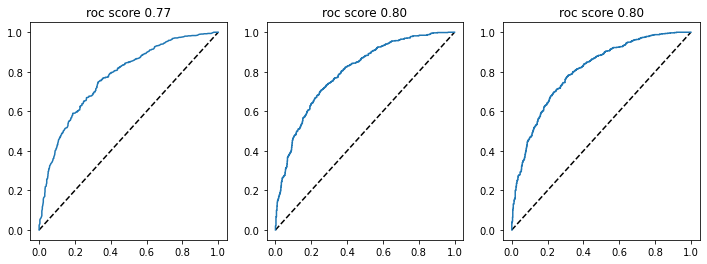

In [26]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.3)

fig = plt.figure(figsize=[12, 4])
for i, (name, clf) in enumerate(classifiers.items()):
    print('Running', name)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    # plot
    ax = fig.add_subplot(1, 3, i+1)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.plot(fpr, tpr)
    ax.set_title('roc score {0:.2f}'.format(roc_auc_score(y_test, y_pred)))

<AxesSubplot:title={'center':'y_pred'}, xlabel='[y_true]'>

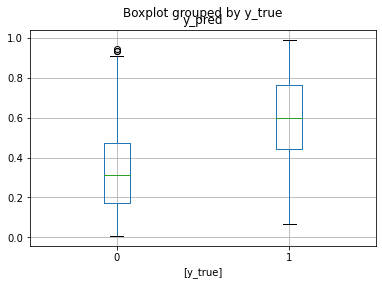

In [27]:
pd.DataFrame({'y_pred': y_pred, 'y_true': y_test}).boxplot(by='y_true')

In [28]:
rf = RandomForestClassifier(n_estimators=300)
rf = rf.fit(train_X, train_y)

lr = LogisticRegression(C=1e-5)
lr = lr.fit(train_X, train_y)

lgb = LGBMClassifier(n_estimators=300, learning_rate=.01)
lgb = lgb.fit(train_X, train_y)

Strong team not always wins, higher probability only gives better wining chance

In [29]:
world_cup_rankings = df[['Team', 'Group']]
world_cup_rankings = world_cup_rankings.merge(rankings_sub[rankings_sub['year']==2018], left_on='Team', right_on='country_full')
world_cup_rankings.drop('country_full', axis=1, inplace=True)
world_cup_rankings = world_cup_rankings.set_index('Team')
world_cup_rankings.head()

,Group,year,rank,total_points
Team,,,,
Russia,A,2018,55.750000,992.833333
Saudi Arabia,A,2018,68.333333,935.500000
Egypt,A,2018,50.500000,1061.333333
Uruguay,A,2018,13.166667,1321.666667
Spain,B,2018,7.916667,1433.083333


In [30]:
world_cup_rankings['Points'] = 0
for group in world_cup_rankings['Group'].unique():
    print('*******************************')
    print('Simulating Group', group)
    group_teams = list(world_cup_rankings.query('Group=="{}"'.format(group)).index)
    for home, away in combinations(group_teams, 2):
        print('//*************************//')
        print('{} vs {}'.format(home, away))
        row = pd.DataFrame(columns=train_X.columns)
        row.loc[0, 'neutral'] = 1
        row['total_points_x'] = world_cup_rankings.loc[home, 'total_points']
        row['rank_x'] = world_cup_rankings.loc[home, 'rank']
        row['total_points_y'] = world_cup_rankings.loc[away, 'total_points']
        row['rank_y'] = world_cup_rankings.loc[away, 'rank']
        row['total_diff'] = row['total_points_x'] - row['total_points_y']
        row['rank_diff'] = row['rank_x'] - row['rank_y']
        # get wining probability
        y_pred = np.mean([lr.predict_proba(row)[:, 1][0], lgb.predict_proba(row.values)[:, 1][0], rf.predict_proba(row)[:, 1][0]])
        # if y_pred in [0.4, 0.55] then draw
        if (y_pred > 0.4) & (y_pred < 0.55):
            print('Draw')
            world_cup_rankings.loc[home, 'Points'] += 1
            world_cup_rankings.loc[away, 'Points'] += 1
        else:
            # give a sense of randomness
            is_win = np.random.choice([1, 0], p=[y_pred, 1-y_pred])
            if is_win:
                world_cup_rankings.loc[home, 'Points'] += 3
                print('{} wins!'.format(home))
            else:
                world_cup_rankings.loc[away, 'Points'] += 3
                print('{} wins!'.format(away))

*******************************
Simulating Group A
//*************************//
Russia vs Saudi Arabia
Draw
//*************************//
Russia vs Egypt
Russia wins!
//*************************//
Russia vs Uruguay
Uruguay wins!
//*************************//
Saudi Arabia vs Egypt
Draw
//*************************//
Saudi Arabia vs Uruguay
Uruguay wins!
//*************************//
Egypt vs Uruguay
Uruguay wins!
*******************************
Simulating Group B
//*************************//
Spain vs Morocco
Draw
*******************************
Simulating Group C
//*************************//
France vs Australia
France wins!
//*************************//
France vs Peru
France wins!
//*************************//
France vs Denmark
France wins!
//*************************//
Australia vs Peru
Peru wins!
//*************************//
Australia vs Denmark
Denmark wins!
//*************************//
Peru vs Denmark
Denmark wins!
*******************************
Simulating Group D
//***********

In [31]:
world_cup_rankings

,Group,year,rank,total_points,Points
Team,,,,,
Russia,A,2018,55.750000,992.833333,4
Saudi Arabia,A,2018,68.333333,935.500000,2
Egypt,A,2018,50.500000,1061.333333,1
Uruguay,A,2018,13.166667,1321.666667,9
Spain,B,2018,7.916667,1433.083333,1
Morocco,B,2018,42.416667,1094.000000,1
France,C,2018,2.916667,1561.666667,9
Australia,C,2018,38.916667,1115.833333,0
Peru,C,2018,15.500000,1360.166667,3


In [32]:
final_teams = world_cup_rankings.sort_values(by=['Group', 'Points'], ascending=False).reset_index()
final_teams = final_teams.groupby('Group').apply(lambda x: x.iloc[[0, 1]]).reset_index(drop=True)
final_teams.set_index('Team', inplace=True)
final_teams

,Group,year,rank,total_points,Points
Team,,,,,
Uruguay,A,2018,13.166667,1321.666667,9
Russia,A,2018,55.750000,992.833333,4
Spain,B,2018,7.916667,1433.083333,1
Morocco,B,2018,42.416667,1094.000000,1
France,C,2018,2.916667,1561.666667,9
Denmark,C,2018,11.333333,1366.833333,6
Croatia,D,2018,11.083333,1355.000000,9
Iceland,D,2018,26.833333,1250.166667,4
Brazil,E,2018,2.583333,1596.333333,4


In [33]:
pairing = [0, 3, 4, 7, 1, 2, 5, 6, 8, 11, 12, 15, 9, 10, 13, 14]

In [34]:
final_teams = final_teams.iloc[pairing]

finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']
for f in finals:
    print('######################################')
    print('Simulation of {}'.format(f))
    winners = []
    rds = int(len(final_teams)/2)
    for i in range(rds):
        home = final_teams.index[2*i]
        away = final_teams.index[2*i+1]
        print('{} vs {}'.format(home, away))
        row = pd.DataFrame(columns=train_X.columns)
        row.loc[0, 'neutral'] = 1
        row['total_points_x'] = final_teams.loc[home, 'total_points']
        row['rank_x'] = final_teams.loc[home, 'rank']
        row['total_points_y'] = final_teams.loc[away, 'total_points']
        row['rank_y'] = final_teams.loc[away, 'rank']
        row['total_diff'] = row['total_points_x'] - row['total_points_y']
        row['rank_diff'] = row['rank_x'] - row['rank_y']
        # get wining probability
        y_pred = np.mean([lr.predict_proba(row)[:, 1][0], lgb.predict_proba(row.values)[:, 1][0], rf.predict_proba(row)[:, 1][0]])
       
         # give a sense of randomness
        is_win = np.random.choice([1, 0], p=[y_pred, 1-y_pred])
        if is_win:
            winners.append(home)
            print('{} wins!'.format(home))
        else:
            winners.append(away)
            print('{} wins!'.format(away))
    final_teams = final_teams.loc[winners]
print('*******************************')
print('The Champion of 2018 World Cup is {}!!!!!!!!!!!!!!!!!!!!!!!'.format(winners[0]))

######################################
Simulation of round_of_16
Uruguay vs Morocco
Uruguay wins!
France vs Iceland
France wins!
Russia vs Spain
Spain wins!
Denmark vs Croatia
Croatia wins!
Brazil vs Sweden
Sweden wins!
Belgium vs Poland
Poland wins!
Switzerland vs Germany
Switzerland wins!
England vs Japan
England wins!
######################################
Simulation of quarterfinal
Uruguay vs France
France wins!
Spain vs Croatia
Croatia wins!
Sweden vs Poland
Sweden wins!
Switzerland vs England
Switzerland wins!
######################################
Simulation of semifinal
France vs Croatia
France wins!
Sweden vs Switzerland
Switzerland wins!
######################################
Simulation of final
France vs Switzerland
France wins!
*******************************
The Champion of 2018 World Cup is France!!!!!!!!!!!!!!!!!!!!!!!


### So one simulation may have some kind of accident, compile the whole simulation process to perform multiple simulations

In [35]:
def pred_wining(dat, home, away):
    row = pd.DataFrame(columns=train_X.columns)
    row.loc[0, 'neutral'] = 1
    row['total_points_x'] = dat.loc[home, 'total_points']
    row['rank_x'] = dat.loc[home, 'rank']
    row['total_points_y'] = dat.loc[away, 'total_points']
    row['rank_y'] = dat.loc[away, 'rank']
    row['total_diff'] = row['total_points_x'] - row['total_points_y']
    row['rank_diff'] = row['rank_x'] - row['rank_y']
    
    y_pred = np.mean([lr.predict_proba(row)[:, 1][0], lgb.predict_proba(row.values)[:, 1][0], rf.predict_proba(row)[:, 1][0]])
    return y_pred

def main():
    # Group Stage
    world_cup_rankings['Points'] = 0
    for group in world_cup_rankings['Group'].unique():
        group_teams = list(world_cup_rankings.query('Group=="{}"'.format(group)).index)
        for home, away in combinations(group_teams, 2):
            # get wining probability
            y_pred = pred_wining(world_cup_rankings, home, away)
            # if y_pred in [0.4, 0.55] then draw
            if (y_pred > 0.4) & (y_pred < 0.55):
                world_cup_rankings.loc[home, 'Points'] += 1
                world_cup_rankings.loc[away, 'Points'] += 1
            else:
                # give a sense of randomness
                is_win = np.random.choice([1, 0], p=[y_pred, 1-y_pred])
                if is_win:
                    world_cup_rankings.loc[home, 'Points'] += 3
                else:
                    world_cup_rankings.loc[away, 'Points'] += 3
    # Eliminating Stage
    final_teams = world_cup_rankings.sort_values(by=['Group', 'Points'], ascending=False).reset_index()
    final_teams = final_teams.groupby('Group').apply(lambda x: x.iloc[[0, 1]]).reset_index(drop=True)
    final_teams.set_index('Team', inplace=True)
    final_teams = final_teams.iloc[pairing]
    
    for f in finals:
        winners = []
        rds = int(len(final_teams)/2)
        for i in range(rds):
            home = final_teams.index[2*i]
            away = final_teams.index[2*i+1]
            y_pred = pred_wining(world_cup_rankings, home, away)
            # give a sense of randomness
            is_win = np.random.choice([1, 0], p=[y_pred, 1-y_pred])
            if is_win:
                winners.append(home)
            else:
                winners.append(away)
        final_teams = final_teams.loc[winners]
    print('The Champion of 2018 World Cup is {}!!!!!!!!!!!!!!!!!!!!!!!'.format(winners[0]))
    return winners[0]

In [36]:
num_simulations = 100
pairing = [0, 3, 4, 7, 1, 2, 5, 6, 8, 11, 12, 15, 9, 10, 13, 14]
finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']

In [37]:
if __name__ == '__main__':
    champions = []
    for sim in range(num_simulations):
        print('######## Simulation {} ########'.format(sim+1))
        champions.append(main())

######## Simulation 1 ########
The Champion of 2018 World Cup is Belgium!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 2 ########
The Champion of 2018 World Cup is Germany!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 3 ########
The Champion of 2018 World Cup is Croatia!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 4 ########
The Champion of 2018 World Cup is Germany!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 5 ########
The Champion of 2018 World Cup is France!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 6 ########
The Champion of 2018 World Cup is Senegal!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 7 ########
The Champion of 2018 World Cup is Belgium!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 8 ########
The Champion of 2018 World Cup is France!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 9 ########
The Champion of 2018 World Cup is Switzerland!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 10 ########
The Champion of 2018 World Cup is Japan!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 11 ########
The Cha

The Champion of 2018 World Cup is Brazil!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 87 ########
The Champion of 2018 World Cup is Argentina!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 88 ########
The Champion of 2018 World Cup is Belgium!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 89 ########
The Champion of 2018 World Cup is Spain!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 90 ########
The Champion of 2018 World Cup is France!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 91 ########
The Champion of 2018 World Cup is Switzerland!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 92 ########
The Champion of 2018 World Cup is Poland!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 93 ########
The Champion of 2018 World Cup is France!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 94 ########
The Champion of 2018 World Cup is France!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 95 ########
The Champion of 2018 World Cup is Poland!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 96 ########
The Champion of 2018 World Cup i

In [38]:
import gc
gc.collect()

456

<AxesSubplot:title={'center':'World Cup Champion 2018'}>

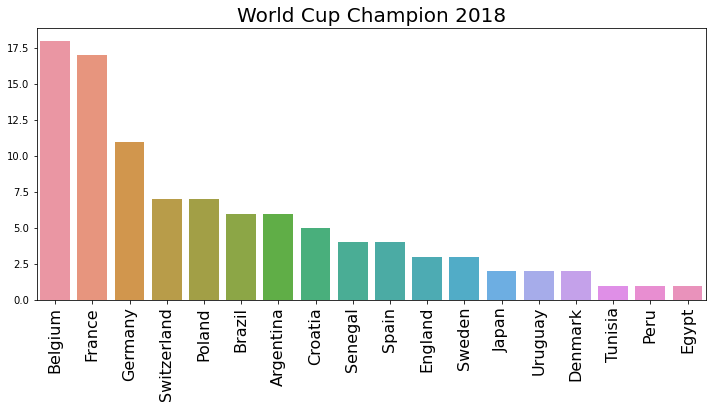

In [39]:
from collections import Counter
import operator
import matplotlib
import seaborn as sns

sorted_champ = Counter(champions).most_common()

fig, ax = plt.subplots(figsize=[12, 5])
plt.xticks(rotation=90, size=16)
ax.set_title('World Cup Champion 2018', size=20)
sns.barplot(x=[t[0] for t in sorted_champ], y=[t[1] for t in sorted_champ], ax=ax)